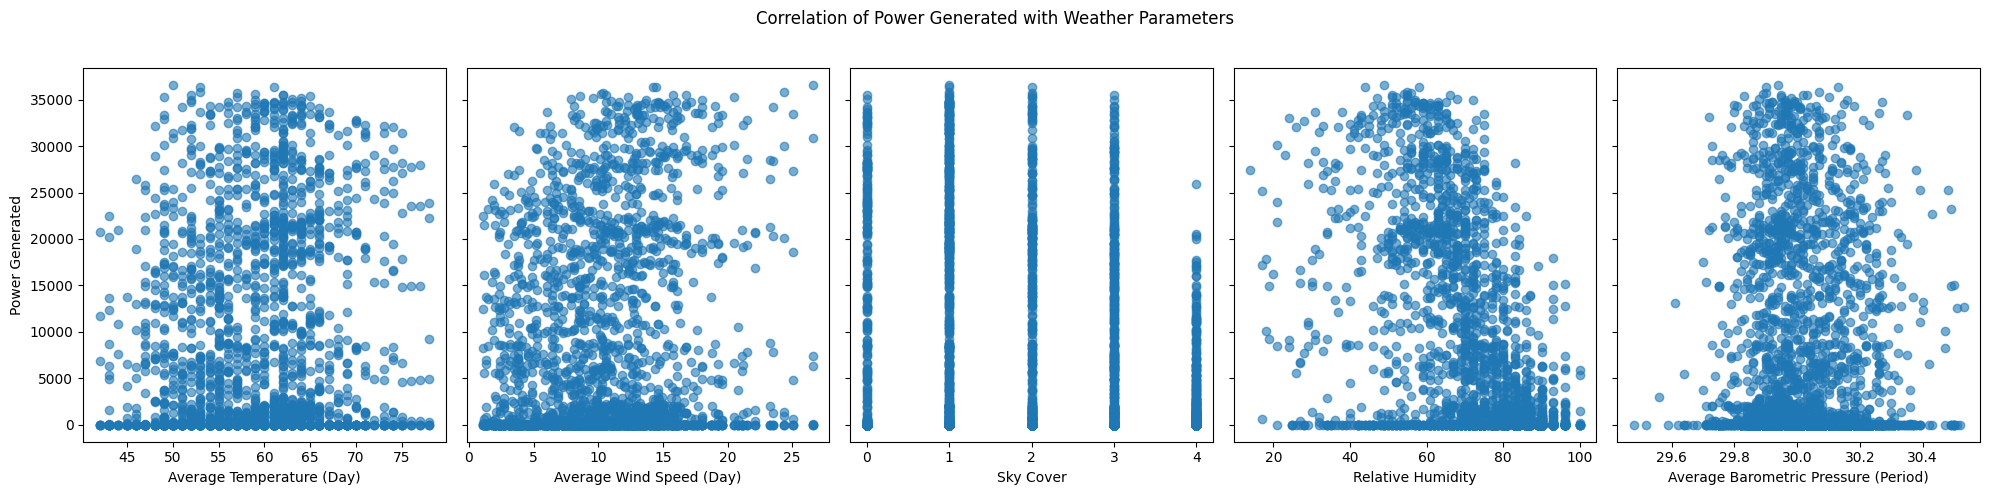

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file path if needed)
file_path = '../Dataset/Sonar.csv'  # replace this with your actual file path
data = pd.read_csv(file_path)

# Selecting relevant columns for plotting
variables = ["Average Temperature (Day)", "Average Wind Speed (Day)", "Sky Cover", 
             "Relative Humidity", "Average Barometric Pressure (Period)", "Power Generated"]

# Filtering the data to only include rows without NaN values in the selected columns
data = data[variables].dropna()

# Creating the scatter plot matrix
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
fig.suptitle('Correlation of Power Generated with Weather Parameters')

# Plotting each scatter plot
for i, var in enumerate(variables[:-1]):
    axes[i].scatter(data[var], data["Power Generated"], alpha=0.6)
    axes[i].set_xlabel(var)
    if i == 0:
        axes[i].set_ylabel("Power Generated")

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


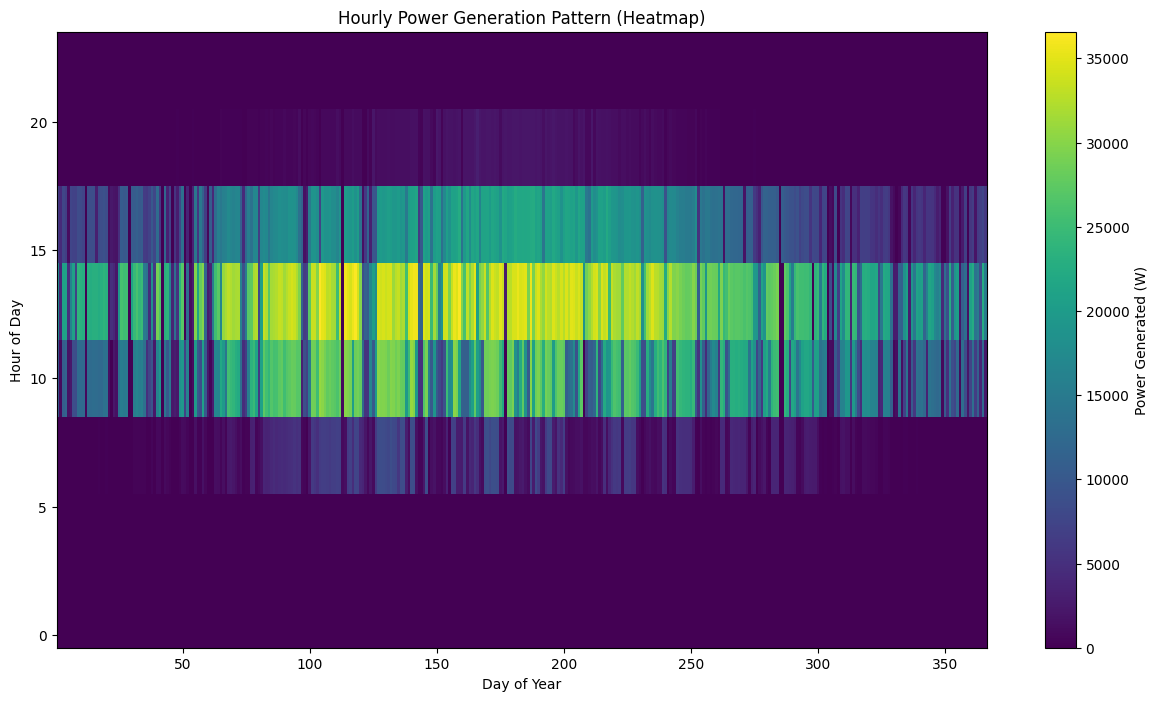

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset (replace with your actual file path)
file_path = '../Dataset/Sonar.csv'  # replace this with your actual file path
data = pd.read_csv(file_path)

# Ensure the dataset has the necessary columns
# We need 'Day of Year', 'First Hour of Period', and 'Power Generated' for the heatmap
# Filter out rows with missing required data
data = data[['Day of Year', 'First Hour of Period', 'Power Generated']].dropna()

# Pivot data to prepare for the heatmap
# Rows = Hours (0-23), Columns = Days (1-365), Values = Power Generated
heatmap_data = data.pivot_table(
    index='First Hour of Period', 
    columns='Day of Year', 
    values='Power Generated', 
    aggfunc='mean'
)

# Sort indices to ensure correct heatmap order
heatmap_data = heatmap_data.sort_index()

# Set up the figure
plt.figure(figsize=(15, 8))
plt.title("Hourly Power Generation Pattern (Heatmap)")

# Create heatmap
c = plt.pcolormesh(heatmap_data.columns, heatmap_data.index, heatmap_data, shading='auto', cmap='viridis')
plt.colorbar(c, label='Power Generated (W)')

# Set labels
plt.xlabel("Day of Year")
plt.ylabel("Hour of Day")

# Display the plot
plt.show()


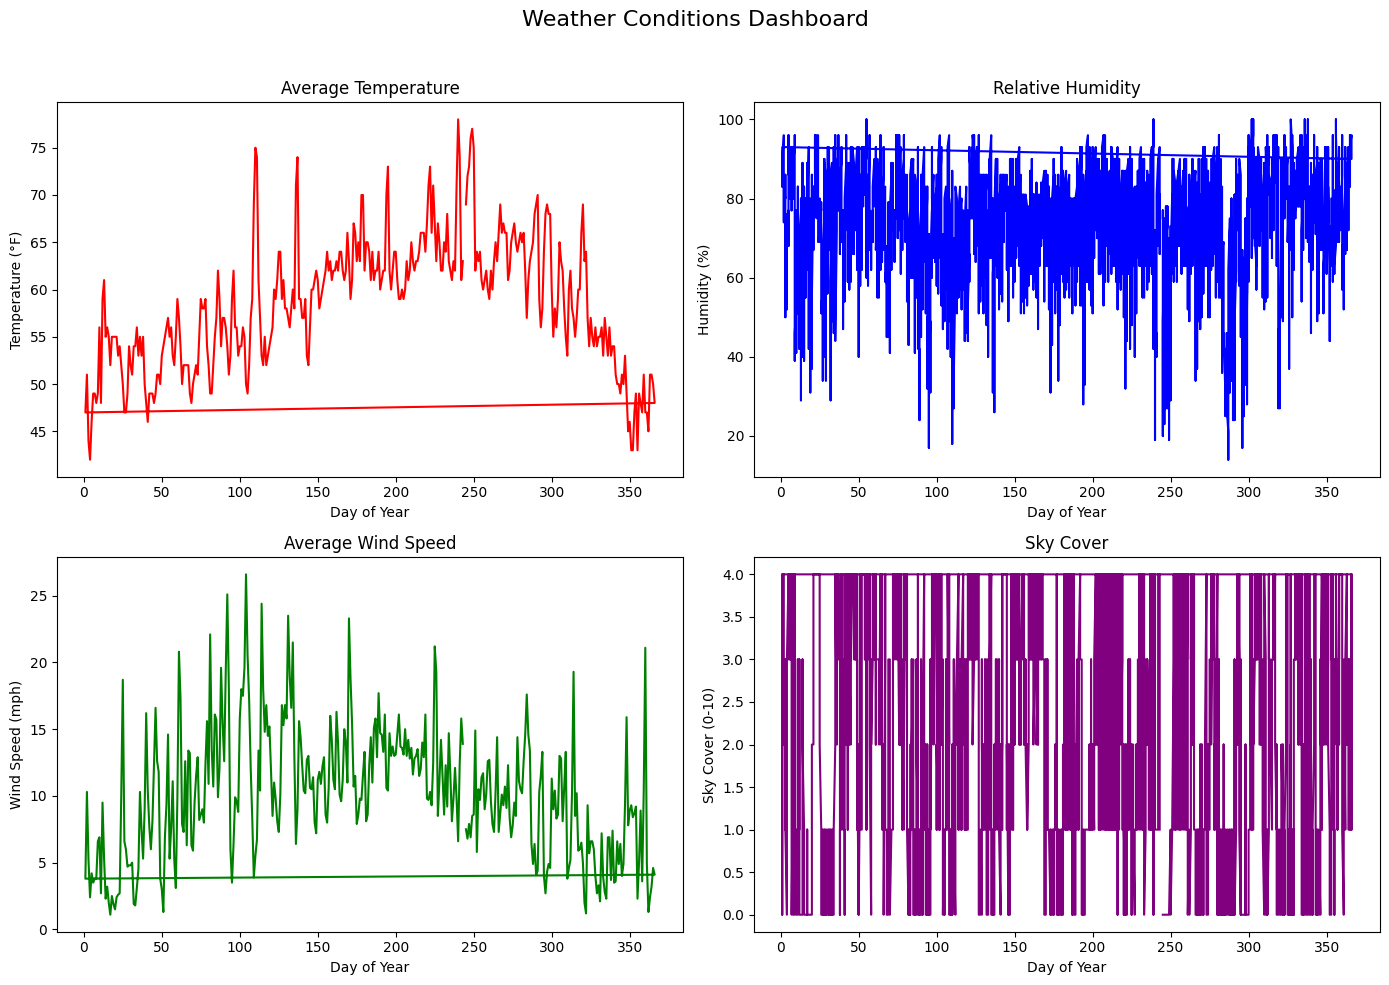

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../Dataset/Sonar.csv'  # replace this with your actual file path
data = pd.read_csv(file_path)
# Ensure necessary columns are available
# We will use 'Day of Year' for the x-axis and plot 'Average Temperature (Day)', 'Relative Humidity',
# 'Average Wind Speed (Day)', and 'Sky Cover' on separate subplots.
data = data[['Day of Year', 'Average Temperature (Day)', 'Relative Humidity', 'Average Wind Speed (Day)', 'Sky Cover']].dropna()

# Set up the figure for the dashboard
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Weather Conditions Dashboard', fontsize=16)

# Line plot for Temperature
axs[0, 0].plot(data['Day of Year'], data['Average Temperature (Day)'], color='red')
axs[0, 0].set_title("Average Temperature")
axs[0, 0].set_xlabel("Day of Year")
axs[0, 0].set_ylabel("Temperature (°F)")

# Line plot for Humidity
axs[0, 1].plot(data['Day of Year'], data['Relative Humidity'], color='blue')
axs[0, 1].set_title("Relative Humidity")
axs[0, 1].set_xlabel("Day of Year")
axs[0, 1].set_ylabel("Humidity (%)")

# Line plot for Wind Speed
axs[1, 0].plot(data['Day of Year'], data['Average Wind Speed (Day)'], color='green')
axs[1, 0].set_title("Average Wind Speed")
axs[1, 0].set_xlabel("Day of Year")
axs[1, 0].set_ylabel("Wind Speed (mph)")

# Line plot for Sky Cover
axs[1, 1].plot(data['Day of Year'], data['Sky Cover'], color='purple')
axs[1, 1].set_title("Sky Cover")
axs[1, 1].set_xlabel("Day of Year")
axs[1, 1].set_ylabel("Sky Cover (0-10)")

# Adjust layout for a clean look
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add some space at the top for the title
plt.show()


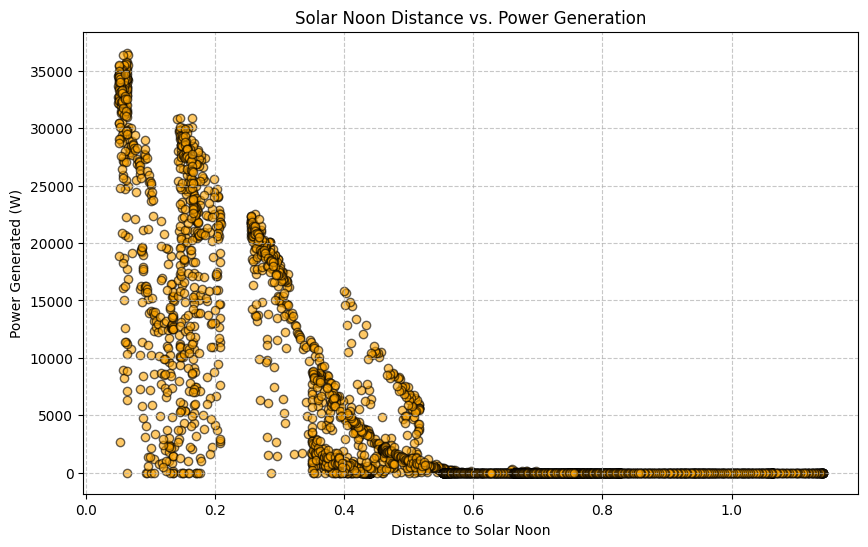

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with the actual file path)
file_path = '../Dataset/Sonar.csv'  # replace this with your actual file path
data = pd.read_csv(file_path)

# Ensure necessary columns are available
# Selecting "Distance to Solar Noon" and "Power Generated" for the scatter plot
data = data[['Distance to Solar Noon', 'Power Generated']].dropna()

# Set up the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Distance to Solar Noon'], data['Power Generated'], alpha=0.6, color='orange', edgecolor='k')

# Adding titles and labels
plt.title('Solar Noon Distance vs. Power Generation')
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated (W)')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


C:\Users\Soroush\AppData\Local\Temp\ipykernel_13108\4152678624.py:38: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


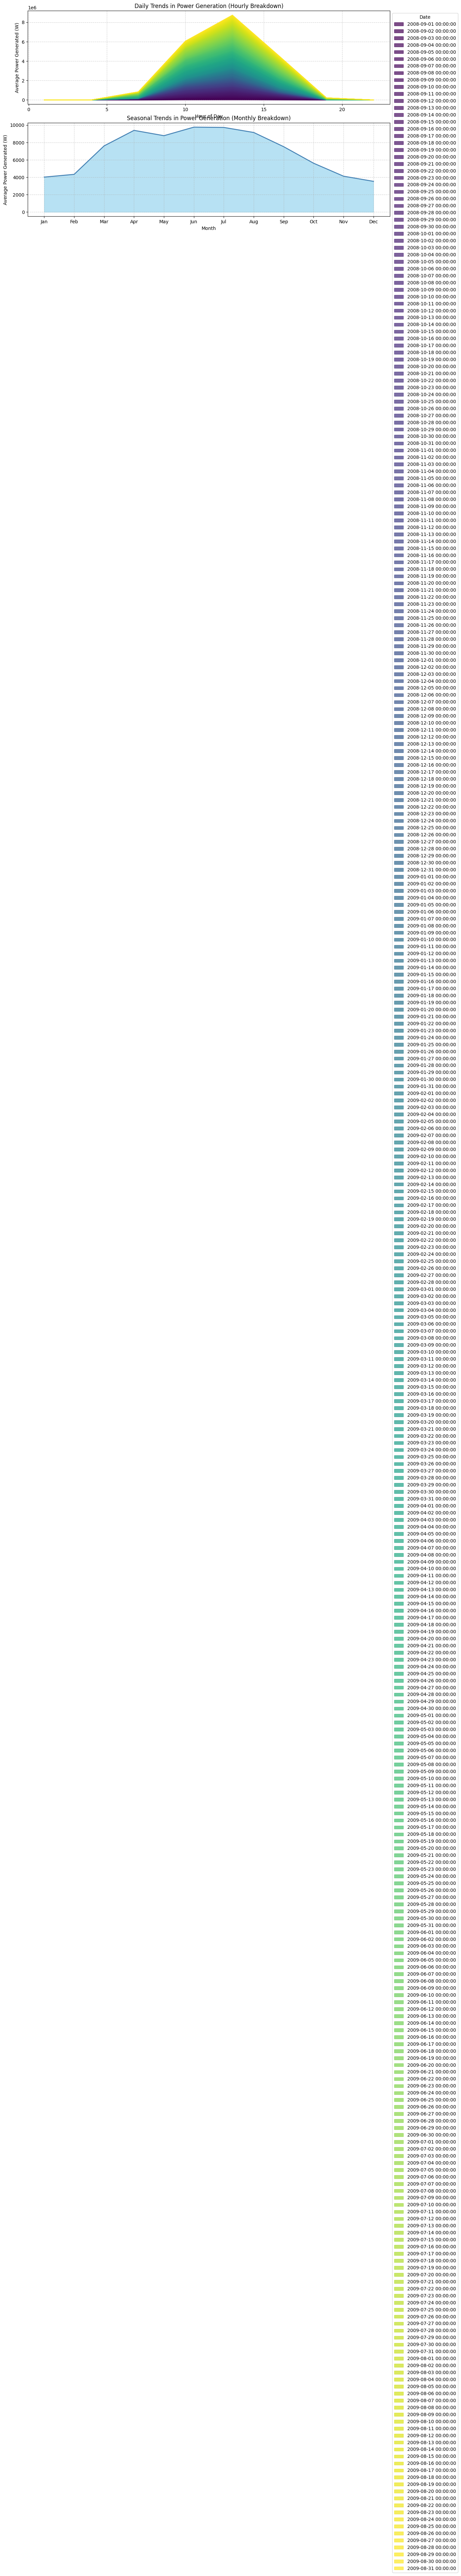

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file path)
file_path = '../Dataset/Sonar.csv'  # replace this with your actual file path
data = pd.read_csv(file_path)

# Convert necessary columns to datetime if they are not already
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Group data for daily trends (average power generated by hour of the day)
hourly_data = data.groupby(['Date', 'First Hour of Period'])['Power Generated'].mean().unstack(fill_value=0)

# Group data for seasonal trends (average power generated by month)
monthly_data = data.groupby(['Month'])['Power Generated'].mean()

# Plotting Daily Trends (Hourly Breakdown for each day)
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
hourly_data.T.plot.area(stacked=True, cmap='viridis', alpha=0.7, ax=plt.gca())
plt.title('Daily Trends in Power Generation (Hourly Breakdown)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power Generated (W)')
plt.legend(title='Date', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)

# Plotting Seasonal Trends (Monthly Breakdown)
plt.subplot(2, 1, 2)
plt.fill_between(monthly_data.index, monthly_data, color='skyblue', alpha=0.6)
plt.plot(monthly_data.index, monthly_data, color='steelblue', linewidth=2)
plt.title('Seasonal Trends in Power Generation (Monthly Breakdown)')
plt.xlabel('Month')
plt.ylabel('Average Power Generated (W)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


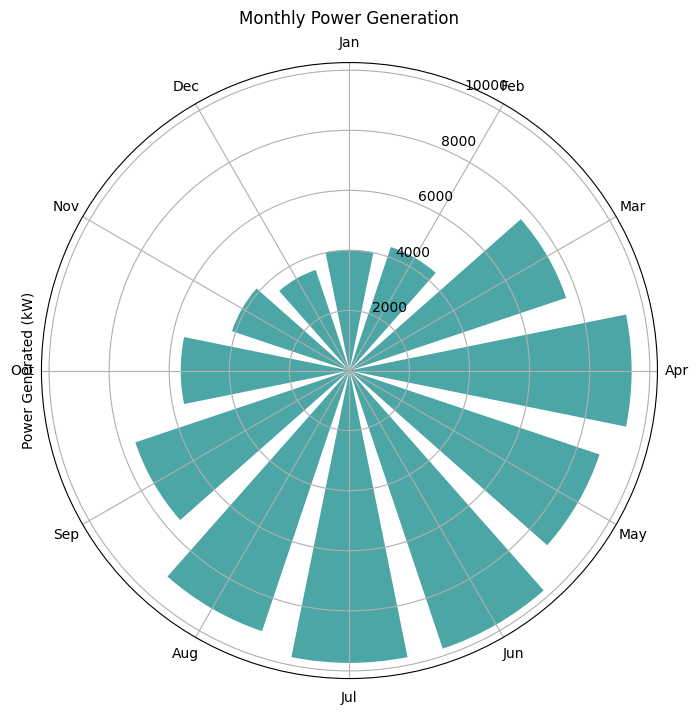

In [7]:
# Group by month and calculate mean power generated for each month
monthly_power = data.groupby('Month')['Power Generated'].mean()

# Convert month to radians for plotting in polar
theta = np.deg2rad((monthly_power.index - 1) * 30)  # 12 months, each is 30°

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.bar(theta, monthly_power.values, width=0.4, color='teal', alpha=0.7)
ax.set_title("Monthly Power Generation", va='bottom')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel("Power Generated (kW)")
plt.show()


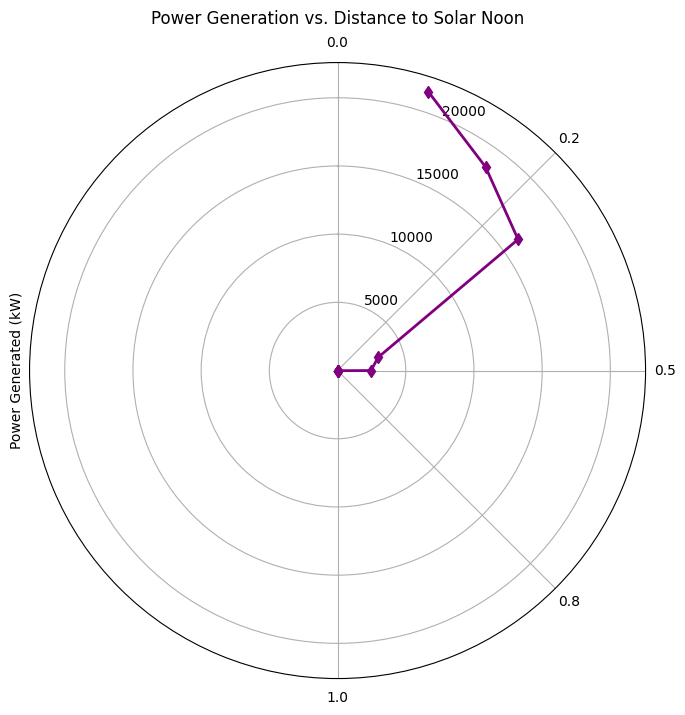

In [8]:
# Group by "Distance to Solar Noon" rounded for simplicity and calculate average power generation
data['Rounded Distance to Solar Noon'] = data['Distance to Solar Noon'].round(1)
solar_noon_power = data.groupby('Rounded Distance to Solar Noon')['Power Generated'].mean()

# Convert distance to radians
theta = np.deg2rad(solar_noon_power.index * 180)  # Scale to 180°

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(theta, solar_noon_power.values, color='purple', marker='d', linestyle='-', linewidth=2)
ax.set_title("Power Generation vs. Distance to Solar Noon", va='bottom')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, np.pi, 5))  # Distance from 0 to 1 in steps
ax.set_xticklabels(np.round(np.linspace(0, 1, 5), 1))
ax.set_ylabel("Power Generated (kW)")
plt.show()


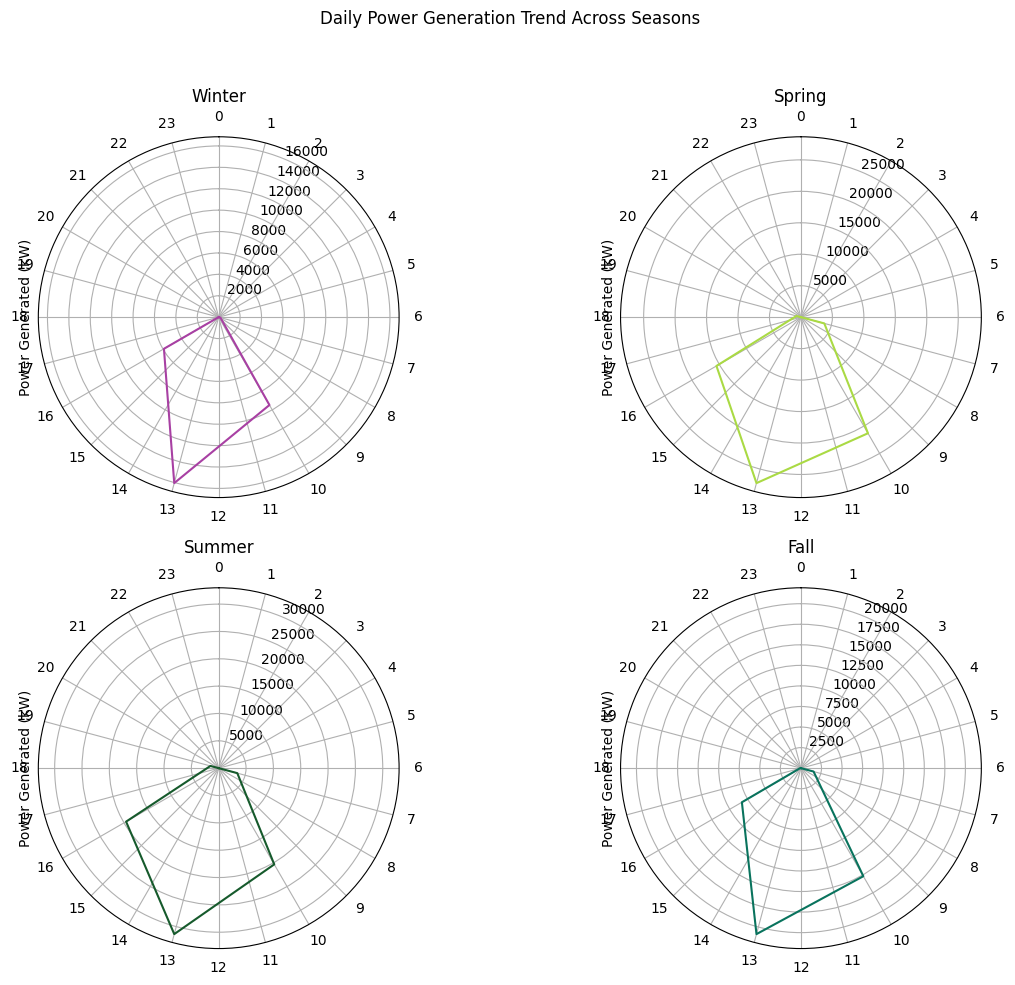

In [9]:
# Separate data into seasons
seasons = {
    'Winter': data[(data['Month'].isin([12, 1, 2]))],
    'Spring': data[(data['Month'].isin([3, 4, 5]))],
    'Summer': data[(data['Month'].isin([6, 7, 8]))],
    'Fall': data[(data['Month'].isin([9, 10, 11]))]
}

# Plotting
plt.figure(figsize=(12, 10))
for i, (season, season_data) in enumerate(seasons.items(), 1):
    ax = plt.subplot(2, 2, i, polar=True)
    hourly_power_season = season_data.groupby('First Hour of Period')['Power Generated'].mean()
    theta = np.deg2rad(hourly_power_season.index * 15)
    ax.plot(theta, hourly_power_season.values, label=f'{season} Power Generation', color=np.random.rand(3,))
    ax.set_title(season)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
    ax.set_xticklabels(range(0, 24))
    ax.set_ylabel("Power Generated (kW)")

plt.suptitle("Daily Power Generation Trend Across Seasons")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\Soroush\AppData\Local\Temp\ipykernel_13108\4225632283.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Q1', 'Q2', 'Q3', 'Q4'])  # Optional: Quarterly labels


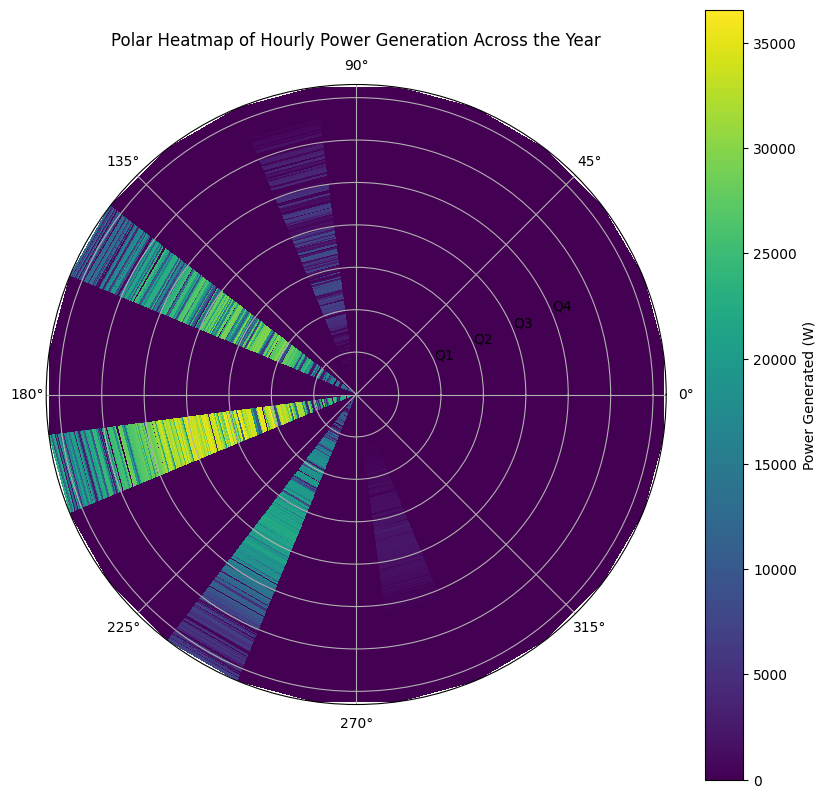

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../Dataset/Sonar.csv'  # replace this with your actual file path
data = pd.read_csv(file_path)

# Convert necessary columns to datetime if they are not already
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Extract day of the year and hour of the day for the polar heatmap
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Hour'] = data['First Hour of Period']

# Pivot data for the polar plot (rows as day of year, columns as hours)
# Fill missing data and ensure a full grid of 365 days by 24 hours
power_pivot = data.pivot_table(values='Power Generated', index='DayOfYear', columns='Hour', fill_value=0)
power_pivot = power_pivot.reindex(index=range(1, 366), columns=range(24), fill_value=0)

# Convert the pivot table to a 2D array for plotting
power_array = power_pivot.values  # 365 days x 24 hours

# Create a polar heatmap
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Define the angular (theta) and radial (r) coordinates
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # 24 hours around the circle
r = np.linspace(1, 365, 365)  # Days of the year as the radial axis

# Plot each hour slice as a radial layer
c = ax.pcolormesh(theta, r, power_array, shading='auto', cmap='viridis')

# Add color bar and labels
fig.colorbar(c, ax=ax, orientation='vertical', label='Power Generated (W)')
ax.set_title("Polar Heatmap of Hourly Power Generation Across the Year", va='bottom')
ax.set_yticklabels(['', 'Q1', 'Q2', 'Q3', 'Q4'])  # Optional: Quarterly labels

# Display the plot
plt.show()


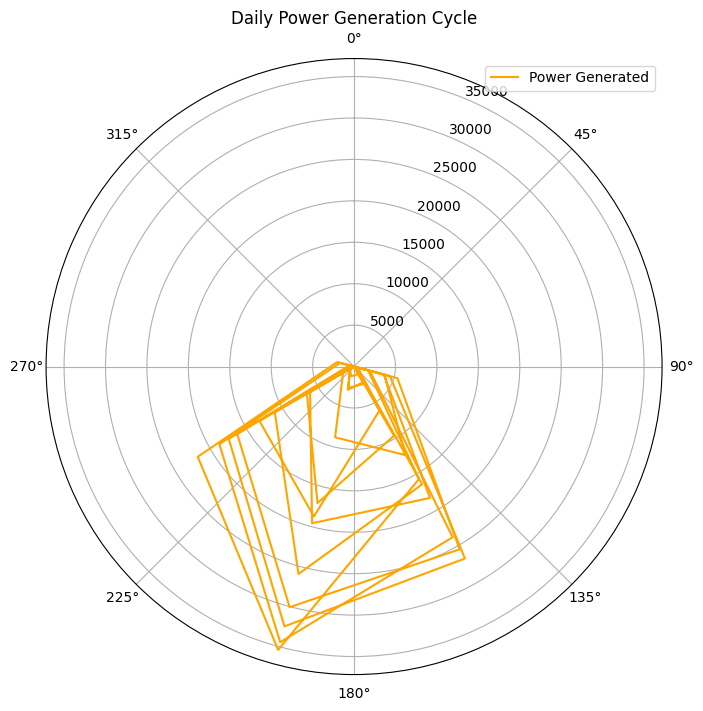

In [11]:
import matplotlib.pyplot as plt
import numpy as np

file_path = '../Dataset/Sonar.csv'  # replace this with your actual file path
data = pd.read_csv(file_path)

# Filter data for a specific day if needed
day_data = data[data['Day'] == 1]  # Example: data for day 1

# Convert "First Hour of Period" to radians (for a circular day)
angles = np.deg2rad(day_data['First Hour of Period'] * 15)  # 24 hours = 360°

# Plot the Polar Line Chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(angles, day_data['Power Generated'], label='Power Generated', color='orange')
ax.set_theta_direction(-1)  # Clockwise
ax.set_theta_offset(np.pi / 2.0)  # Set the 12 o'clock position at the top
ax.set_title("Daily Power Generation Cycle")
plt.legend()
plt.show()


AttributeError: 'Rectangle' object has no attribute 'cmap'

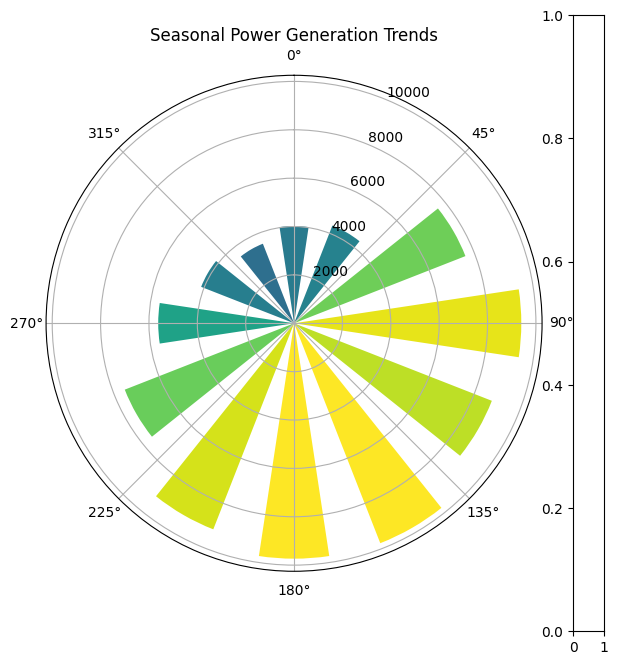

In [12]:
# Monthly average power generation
monthly_avg_power = data.groupby('Month')['Power Generated'].mean()

# Convert months to radians
months = np.deg2rad((monthly_avg_power.index - 1) * 30)  # 12 months in a circle

# Plot the Polar Bar Chart as an approximation to a heatmap
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
bars = ax.bar(months, monthly_avg_power, width=0.3, color=plt.cm.viridis(monthly_avg_power / monthly_avg_power.max()))

# Set polar plot characteristics
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.set_title("Seasonal Power Generation Trends")
plt.colorbar(bars[0], ax=ax, label='Average Power Generated')
plt.show()


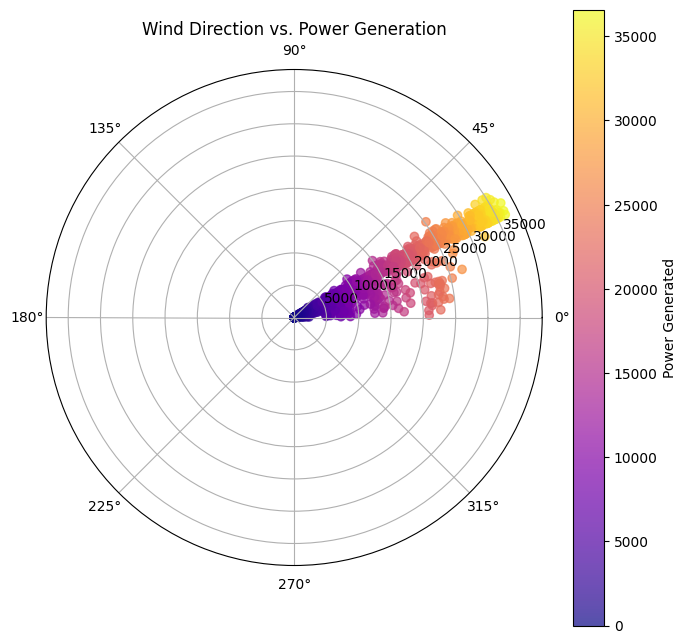

In [13]:
# Convert "Average Wind Direction (Day)" to radians
wind_angles = np.deg2rad(data['Average Wind Direction (Day)'])

# Plot Polar Scatter Chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
sc = ax.scatter(wind_angles, data['Power Generated'], c=data['Power Generated'], cmap='plasma', alpha=0.7)
ax.set_title("Wind Direction vs. Power Generation")
plt.colorbar(sc, label='Power Generated')
plt.show()


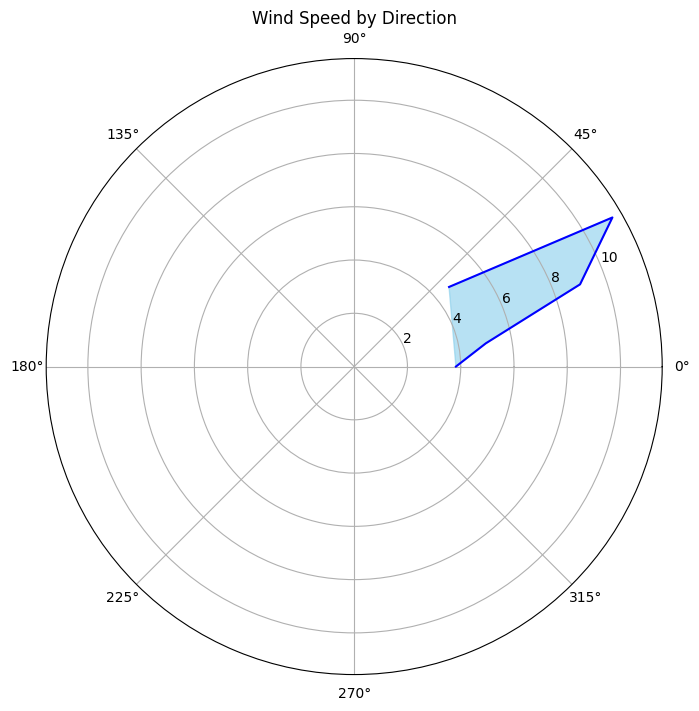

In [14]:
# Average wind speed by direction (rounded to nearest 10 degrees)
data['Wind Direction Rounded'] = (data['Average Wind Direction (Day)'] / 10).round() * 10
wind_speed_avg = data.groupby('Wind Direction Rounded')['Average Wind Speed (Day)'].mean()

# Convert directions to radians
directions = np.deg2rad(wind_speed_avg.index)

# Plot Polar Area Chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.fill(directions, wind_speed_avg, color='skyblue', alpha=0.6)
ax.plot(directions, wind_speed_avg, color='blue')
ax.set_title("Wind Speed by Direction")
plt.show()


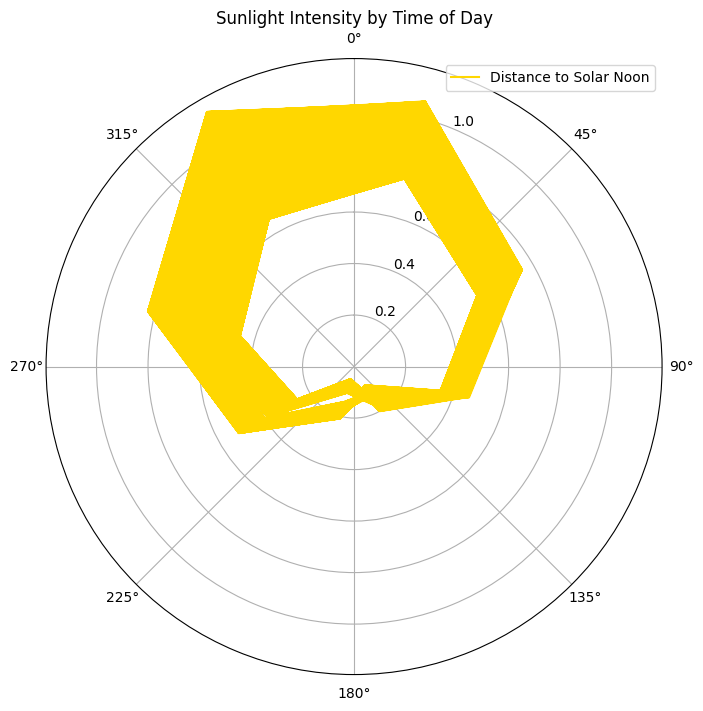

In [15]:
# Convert "First Hour of Period" to radians
day_angles = np.deg2rad(data['First Hour of Period'] * 15)

# Plot Polar Line Chart for sunlight intensity
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(day_angles, data['Distance to Solar Noon'], label='Distance to Solar Noon', color='gold')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.set_title("Sunlight Intensity by Time of Day")
plt.legend()
plt.show()


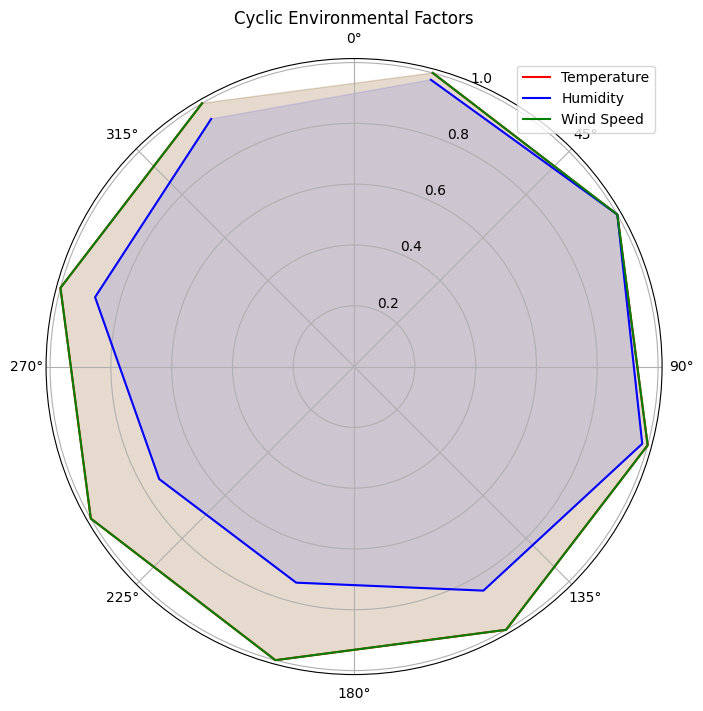

In [16]:
# Average values per hour for a day example
env_factors = data.groupby('First Hour of Period')[['Average Temperature (Day)', 'Relative Humidity', 'Average Wind Speed (Day)']].mean()

# Normalize data for better plotting on a common scale
env_factors_norm = env_factors / env_factors.max()

# Convert hours to radians
hour_angles = np.deg2rad(env_factors_norm.index * 15)

# Plot Polar Polygon Chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Plot each factor
ax.plot(hour_angles, env_factors_norm['Average Temperature (Day)'], label='Temperature', color='red')
ax.plot(hour_angles, env_factors_norm['Relative Humidity'], label='Humidity', color='blue')
ax.plot(hour_angles, env_factors_norm['Average Wind Speed (Day)'], label='Wind Speed', color='green')

# Fill the polygons
ax.fill(hour_angles, env_factors_norm['Average Temperature (Day)'], color='red', alpha=0.1)
ax.fill(hour_angles, env_factors_norm['Relative Humidity'], color='blue', alpha=0.1)
ax.fill(hour_angles, env_factors_norm['Average Wind Speed (Day)'], color='green', alpha=0.1)

ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.set_title("Cyclic Environmental Factors")
plt.legend()
plt.show()


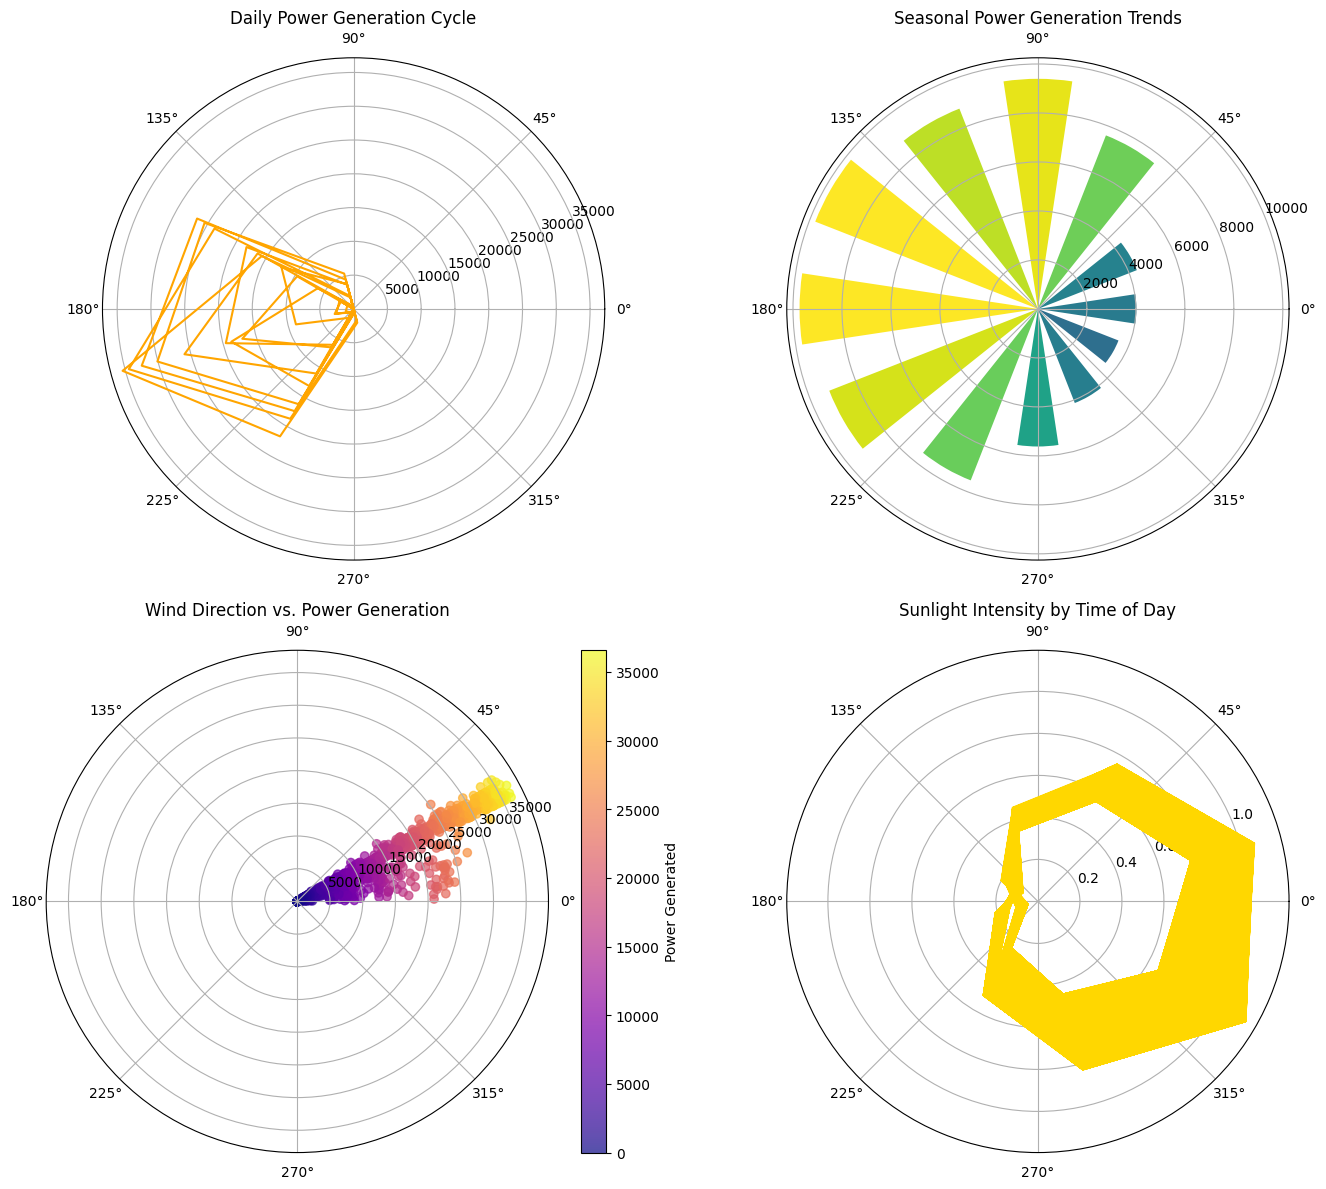

In [17]:
import matplotlib.pyplot as plt
import numpy as np

file_path = '../Dataset/Sonar.csv'  # replace this with your actual file path
data = pd.read_csv(file_path)

day_data = data[data['Day'] == 1]  # Example: data for day 1

fig, axs = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(14, 12))
monthly_avg_power = data.groupby('Month')['Power Generated'].mean()
months = np.deg2rad((monthly_avg_power.index - 1) * 30)  # 12 months in a circle


# Daily Power Generation Cycle
angles = np.deg2rad(day_data['First Hour of Period'] * 15)
axs[0, 0].plot(angles, day_data['Power Generated'], color='orange')
axs[0, 0].set_title("Daily Power Generation Cycle")

# Seasonal Power Generation Trends
bars = axs[0, 1].bar(months, monthly_avg_power, width=0.3, color=plt.cm.viridis(monthly_avg_power / monthly_avg_power.max()))
axs[0, 1].set_title("Seasonal Power Generation Trends")

# Wind Direction vs. Power Generation
wind_angles = np.deg2rad(data['Average Wind Direction (Day)'])
sc = axs[1, 0].scatter(wind_angles, data['Power Generated'], c=data['Power Generated'], cmap='plasma', alpha=0.7)
axs[1, 0].set_title("Wind Direction vs. Power Generation")

# Sunlight Intensity by Time of Day
day_angles = np.deg2rad(data['First Hour of Period'] * 15)
axs[1, 1].plot(day_angles, data['Distance to Solar Noon'], color='gold')
axs[1, 1].set_title("Sunlight Intensity by Time of Day")

# Add colorbars if needed
fig.colorbar(sc, ax=axs[1, 0], label='Power Generated')

plt.tight_layout()
plt.show()


C:\Users\Soroush\AppData\Local\Temp\ipykernel_13108\787814520.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_yticklabels(['', 'Q1', 'Q2', 'Q3', 'Q4'])  # Optional: Quarterly labels


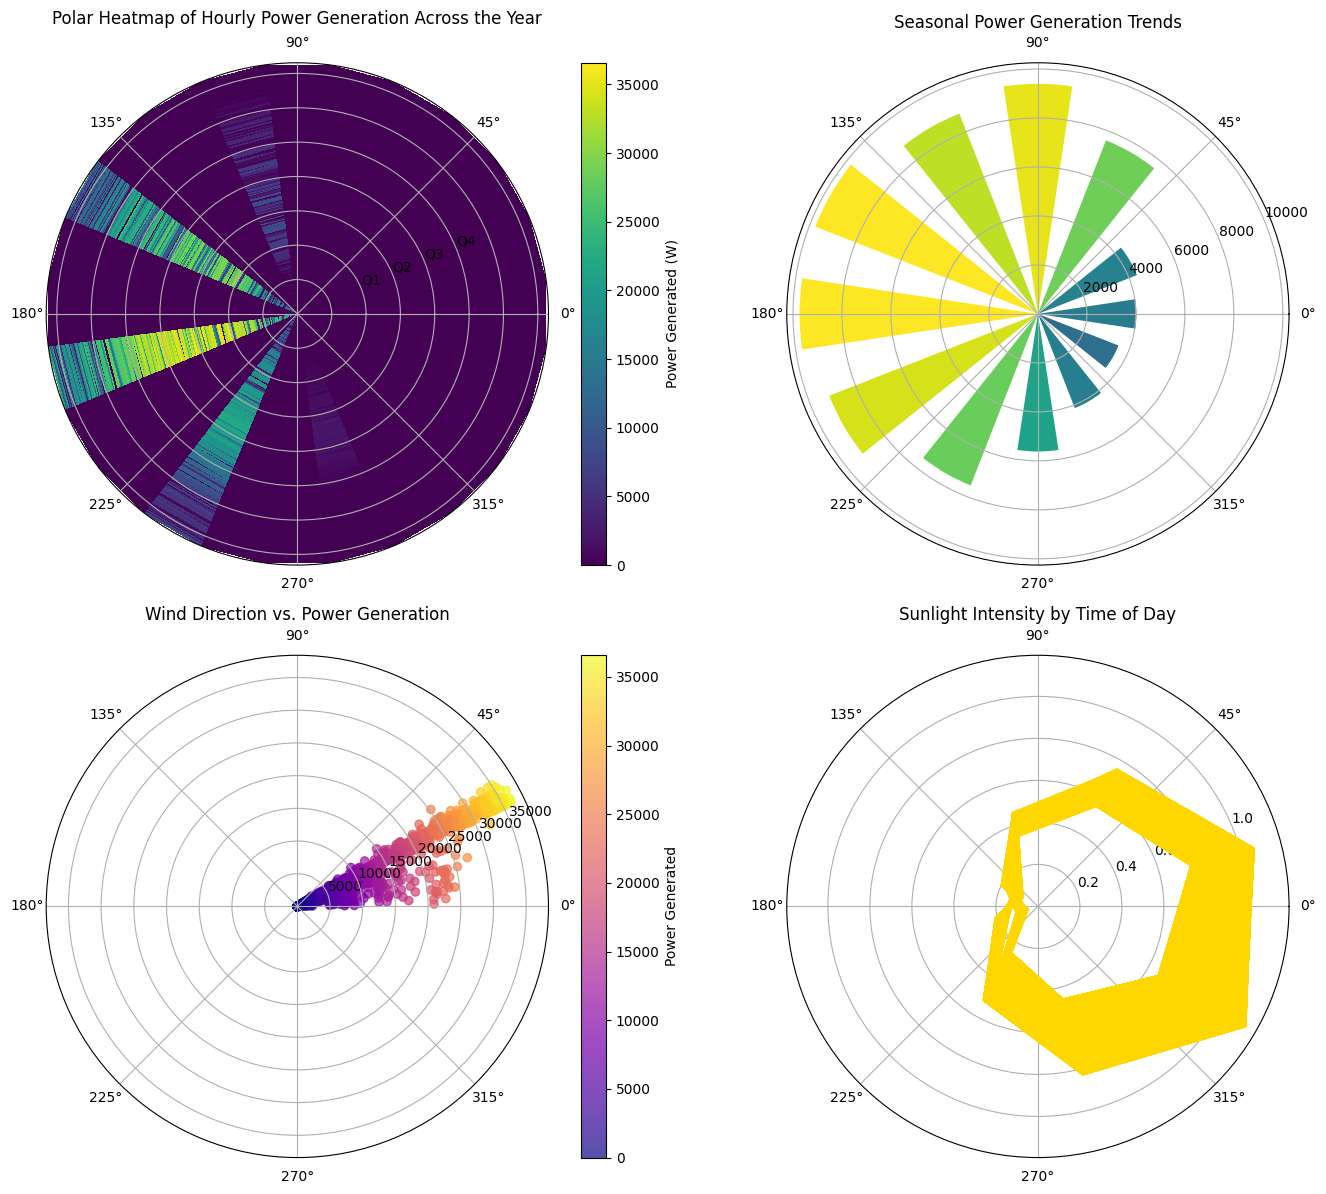

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../Dataset/Sonar.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Convert necessary columns to datetime if they are not already
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Extract day of the year and hour of the day for the polar heatmap
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Hour'] = data['First Hour of Period']

# Pivot data for the polar plot (rows as day of year, columns as hours)
# Fill missing data and ensure a full grid of 365 days by 24 hours
power_pivot = data.pivot_table(values='Power Generated', index='DayOfYear', columns='Hour', fill_value=0)
power_pivot = power_pivot.reindex(index=range(1, 366), columns=range(24), fill_value=0)

# Convert the pivot table to a 2D array for plotting
power_array = power_pivot.values  # 365 days x 24 hours

# Create a 2x2 grid for subplots with the first subplot being the Polar Heatmap
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(14, 12))

# Replace "Daily Power Generation Cycle" with "Polar Heatmap of Hourly Power Generation Across the Year"
# Define the angular (theta) and radial (r) coordinates
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # 24 hours around the circle
r = np.linspace(1, 365, 365)  # Days of the year as the radial axis

# Plot each hour slice as a radial layer in the polar heatmap
c = axs[0, 0].pcolormesh(theta, r, power_array, shading='auto', cmap='viridis')
axs[0, 0].set_title("Polar Heatmap of Hourly Power Generation Across the Year", va='bottom')
fig.colorbar(c, ax=axs[0, 0], orientation='vertical', label='Power Generated (W)')
axs[0, 0].set_yticklabels(['', 'Q1', 'Q2', 'Q3', 'Q4'])  # Optional: Quarterly labels

# Seasonal Power Generation Trends
monthly_avg_power = data.groupby('Month')['Power Generated'].mean()
months = np.deg2rad((monthly_avg_power.index - 1) * 30)  # 12 months in a circle
bars = axs[0, 1].bar(months, monthly_avg_power, width=0.3, color=plt.cm.viridis(monthly_avg_power / monthly_avg_power.max()))
axs[0, 1].set_title("Seasonal Power Generation Trends")

# Wind Direction vs. Power Generation
wind_angles = np.deg2rad(data['Average Wind Direction (Day)'])
sc = axs[1, 0].scatter(wind_angles, data['Power Generated'], c=data['Power Generated'], cmap='plasma', alpha=0.7)
axs[1, 0].set_title("Wind Direction vs. Power Generation")

# Sunlight Intensity by Time of Day
day_angles = np.deg2rad(data['First Hour of Period'] * 15)
axs[1, 1].plot(day_angles, data['Distance to Solar Noon'], color='gold')
axs[1, 1].set_title("Sunlight Intensity by Time of Day")

# Add colorbar for "Wind Direction vs. Power Generation"
fig.colorbar(sc, ax=axs[1, 0], label='Power Generated')

plt.tight_layout()
plt.show()


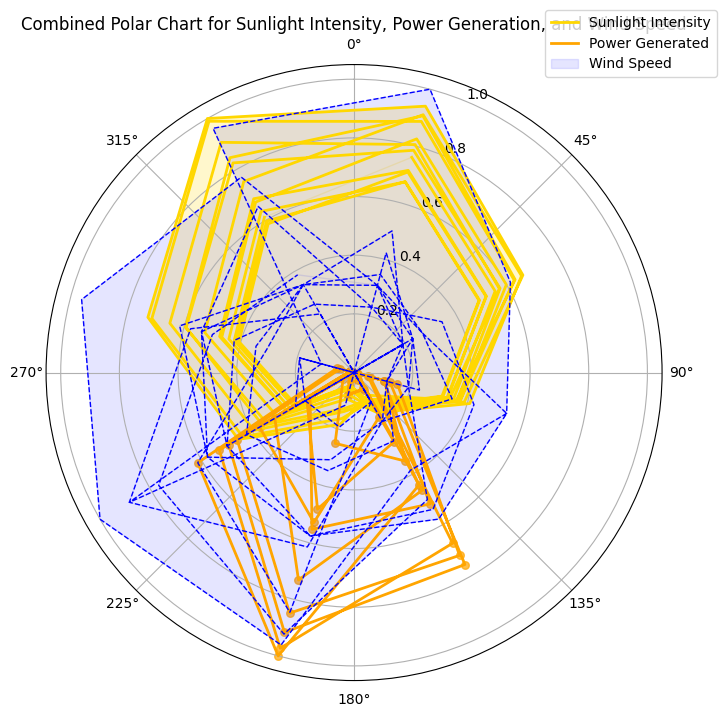

In [20]:
import matplotlib.pyplot as plt
import numpy as np



# Convert time (First Hour of Period) to radians for circular layout
angles = np.deg2rad(day_data['First Hour of Period'] * 15)

# Normalize data for comparison on a common scale (between 0 and 1)
sunlight_intensity = day_data['Distance to Solar Noon'] / day_data['Distance to Solar Noon'].max()
power_generated = day_data['Power Generated'] / day_data['Power Generated'].max()
wind_speed = day_data['Average Wind Speed (Period)'] / day_data['Average Wind Speed (Period)'].max()

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot sunlight intensity as a polar line with fill
ax.plot(angles, sunlight_intensity, label='Sunlight Intensity', color='gold', linewidth=2)
ax.fill(angles, sunlight_intensity, color='gold', alpha=0.2)

# Plot power generation as a polar line
ax.plot(angles, power_generated, label='Power Generated', color='orange', linewidth=2)
ax.scatter(angles, power_generated, color='orange', s=30, alpha=0.7)  # Highlight points

# Plot wind speed as a polar area plot
ax.fill(angles, wind_speed, color='blue', alpha=0.1, label='Wind Speed')
ax.plot(angles, wind_speed, color='blue', linewidth=1, linestyle='--')

# Enhance plot with labels, title, and legend
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.set_title("Combined Polar Chart for Sunlight Intensity, Power Generation, and Wind Speed")
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


C:\Users\Soroush\AppData\Local\Temp\ipykernel_13108\2835711531.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Q1', 'Q2', 'Q3', 'Q4'])


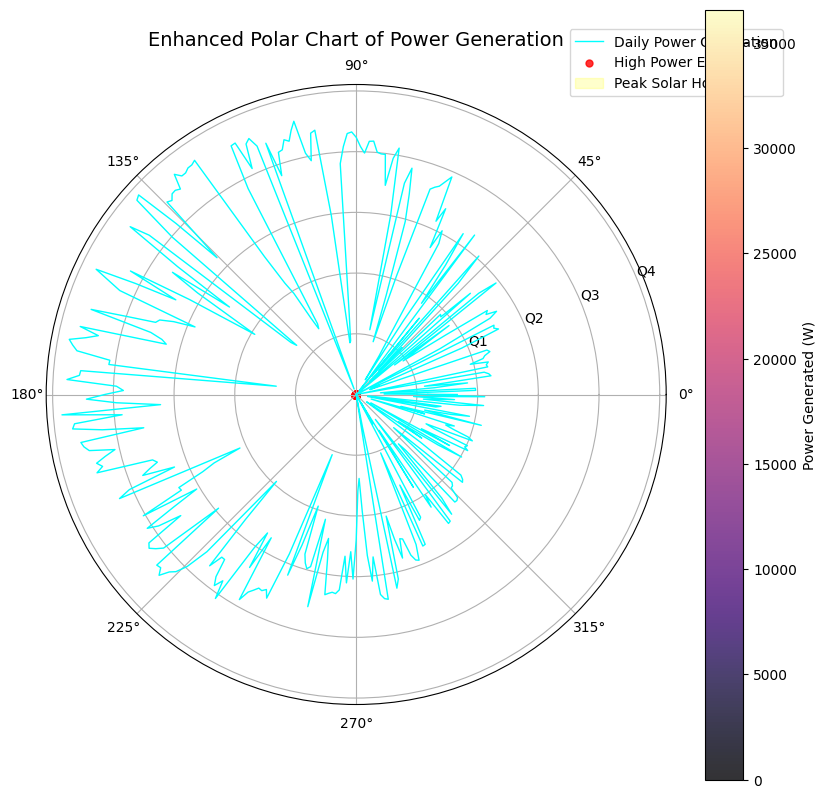

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Convert necessary columns to datetime if they are not already
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Extract day of the year and hour of the day for the polar plot
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Hour'] = data['First Hour of Period']

# Pivot data for the heatmap (rows as day of year, columns as hours)
power_pivot = data.pivot_table(values='Power Generated', index='DayOfYear', columns='Hour', fill_value=0)
power_pivot = power_pivot.reindex(index=range(1, 366), columns=range(24), fill_value=0)
power_array = power_pivot.values  # 365 days x 24 hours

# Summing daily power for line plot
daily_power = data.groupby('DayOfYear')['Power Generated'].sum()

# Create the polar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Set up the radial and angular axes
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # 24 hours around the circle
r = np.linspace(1, 365, 365)  # Days of the year as the radial axis

# Polar Heatmap: Hourly power data across the year
c = ax.pcolormesh(theta, r, power_array, shading='auto', cmap='magma', alpha=0.8)

# Line Plot: Overlay a line to show the daily power generation trend
ax.plot(np.linspace(0, 2 * np.pi, 365), daily_power.values, color='cyan', linewidth=1, label="Daily Power Generation")

# Scatter Plot: Highlight high power events (e.g., top 5% power)
high_power_threshold = data['Power Generated'].quantile(0.95)
high_power_events = data[data['Power Generated'] > high_power_threshold]
ax.scatter(
    np.deg2rad(high_power_events['Hour'] * 15),  # Convert hours to degrees (0-360) for polar plot
    high_power_events['DayOfYear'],
    color='red', s=25, alpha=0.8, label='High Power Events'
)

# Sector Highlight: Shade sectors for peak solar periods
peak_hours = [10, 14]  # E.g., peak hours for solar power are 10 AM to 2 PM
for start, end in zip(peak_hours[:-1], peak_hours[1:]):
    ax.fill_between(
        np.linspace(np.deg2rad(start * 15), np.deg2rad(end * 15), 100),
        1, 365,
        color='yellow', alpha=0.2, label='Peak Solar Hours' if start == peak_hours[0] else None
    )

# Add color bar and labels
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Power Generated (W)')
cbar.ax.tick_params(labelsize=10)
ax.set_title("Enhanced Polar Chart of Power Generation", va='bottom', fontsize=14)

# Optional: Customize radial ticks to show quarters
ax.set_yticklabels(['', 'Q1', 'Q2', 'Q3', 'Q4'])

# Add legend for clarity
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)

plt.show()

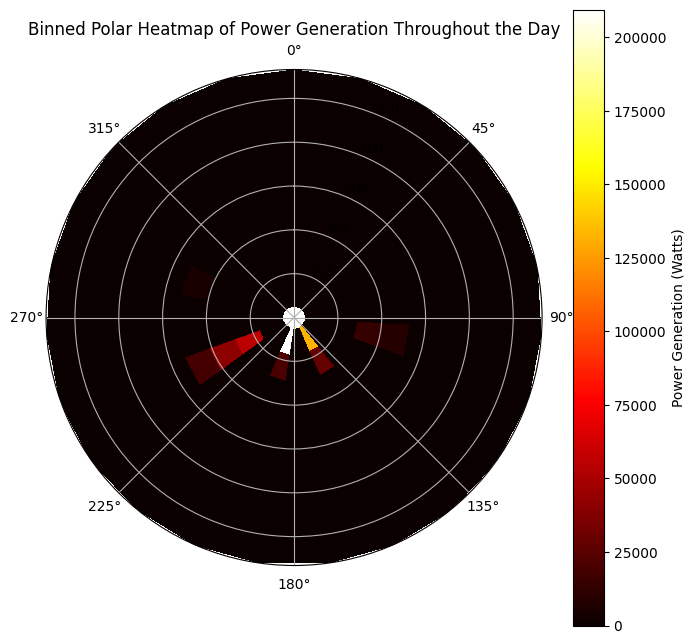

In [23]:
# Binning the data manually for a smoother polar heatmap
num_angular_bins = 24  # e.g., hourly bins
num_radial_bins = 10   # e.g., solar noon distance bins

# Define bins
angle_bins = np.linspace(0, 2 * np.pi, num_angular_bins)
r_bins = np.linspace(r.min(), r.max(), num_radial_bins)

# Create a 2D histogram
hist, _, _ = np.histogram2d(angles, r, bins=[angle_bins, r_bins], weights=c)

# Plotting as a polar heatmap
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
pc = ax.pcolormesh(angle_bins, r_bins, hist.T, cmap='hot', shading='auto')
plt.colorbar(pc, ax=ax, label='Power Generation (Watts)')

ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_title("Binned Polar Heatmap of Power Generation Throughout the Day")

plt.show()


In [43]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Load the dataset
file_path = '../Dataset/Sonar.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Set up LightningChart license
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Generate data points for angles based on the number of rows in the dataset
num_points = len(data)
data['angle'] = np.linspace(0, 360, num_points)  # Angles span 0-360 degrees
data['amplitude'] = data['Power Generated'] / data['Power Generated'].max() * 10  # Normalize amplitude

# Create a PolarChart
chart = lc.PolarChart(
    title="Polar Area Series - Power Generated",
    theme=lc.Themes.Light,
)
chart.get_amplitude_axis().set_title("Normalized Power Generated (1-10)").set_title_font(weight="bold", size=14)
chart.get_radial_axis().set_title("Day of the Year").set_title_font(weight="bold", size=14)
# Add Polar Area Series
area_series = chart.add_area_series().set_name("Power Generation")
area_series.set_data([{'angle': angle, 'amplitude': amp} for angle, amp in zip(data['angle'], data['amplitude'])])
area_series.set_highlight(10)

# Open the chart
chart.open()


127.0.0.1 - - [16/Oct/2024 16:48:53] "GET / HTTP/1.1" 200 -


In [26]:
import lightningchart as lc
import numpy as np
import pandas as pd

# Load and preprocess dataset
file_path = '../Dataset/Sonar.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['hour'] = data['First Hour of Period'] % 24  # Assuming "First Hour" gives us hourly grouping
data['day'] = data['Day of Year']  # Grouping by day of the year

# Create heatmap intensity values by reshaping into a 2D array (e.g., 3x4 matrix)
intensity_values = data.pivot(index='day', columns='hour', values='Power Generated').fillna(0).values.tolist()

# Create the Polar Heatmap
chart = lc.PolarChart(theme=lc.Themes.Light, title="Polar Heatmap - Power Generated by Hour and Day")
heatmap_series = chart.add_heatmap_series(sectors=24, annuli=12)  # Example grid with 24 hours and 12 sectors for months

# Apply intensity values and set palette
heatmap_series.invalidate_intensity_values(intensity_values)
heatmap_series.set_palette_colors(
    steps=[
        {"value": min(map(min, intensity_values)), "color": lc.Color("blue")},
        {"value": max(map(max, intensity_values)), "color": lc.Color("red")}
    ],
    interpolate=True
)

chart.open()


127.0.0.1 - - [16/Oct/2024 16:27:08] "GET / HTTP/1.1" 200 -


In [29]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Load and preprocess dataset
file_path = '../Dataset/Sonar.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Create the polar chart
chart = lc.PolarChart(theme=lc.Themes.Light, title="Polar Point Line - Power Generation")

# Define angles and amplitude for continuous line representation
angles = np.linspace(0, 360, len(data))
amplitudes = data['Power Generated'].values

# Prepare data points and add to chart
data_points = [{'angle': angle, 'amplitude': amp} for angle, amp in zip(angles, amplitudes)]
line_series = chart.add_point_line_series()
line_series.set_data(data_points)
line_series.set_stroke(thickness=2, color=lc.Color("steelblue"))

chart.open()


TypeError: Object of type int64 is not JSON serializable

In [80]:
import lightningchart as lc
import pandas as pd
import numpy as np
from matplotlib import cm

# Load dataset (assuming 'Power Generated' is already calculated for each month)
file_path = '../Dataset/Sonar.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Set LightningChart license
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Group data by month and calculate mean power generated
monthly_data = data.groupby('Month')['Power Generated'].mean()

month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Normalize amplitudes based on power generation
max_power = monthly_data.max()
amplitudes = (monthly_data / max_power).tolist()  # Scale to [0, 1]

# Use a colormap to set colors for each month
colors = cm.viridis(np.linspace(0, 1, len(amplitudes)))

# Create the polar chart
chart = lc.PolarChart(theme=lc.Themes.Light, title="Seasonal Power Generation Trends")
legend=chart.add_legend()
legend.set_margin(180)
# Loop through each month to create a sector with varying amplitude
for i, (month, amplitude) in enumerate(zip(monthly_data.index, amplitudes)):
    angle_start = i * 30
    angle_end = (i + 1) * 30
    color = lc.Color(int(colors[i][0] * 255), int(colors[i][1] * 255), int(colors[i][2] * 255))

    sector = chart.add_sector()
    sector.set_name(month_names[i])
    sector.set_amplitude_start(0)  # Start from the center
    sector.set_amplitude_end(amplitude)  # Set amplitude based on normalized power
    sector.set_angle_start(angle_start)
    sector.set_angle_end(angle_end)
    sector.set_color(color=color)
    sector.set_stroke(color=lc.Color('white'), thickness=1)  # White stroke to separate sectors
    legend.add(sector)


# Show the chart
chart.open()


127.0.0.1 - - [16/Oct/2024 19:31:03] "GET / HTTP/1.1" 200 -


In [105]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Load your dataset
file_path = '../Dataset/Sonar.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Set LightningChart license
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Compute the correlation matrix
corr_matrix = data.corr()

# Convert the correlation matrix to a NumPy array
corr_array = corr_matrix.to_numpy()

# Get the labels (variable names)
labels = corr_matrix.columns

# Create the ChartXY
chart = lc.ChartXY(
    title="Correlation Heatmap",
    theme=lc.Themes.Light
)

# Set grid size based on the number of variables
grid_size_x, grid_size_y = corr_array.shape

# Create the heatmap grid series
heatmap_series = chart.add_heatmap_grid_series(
    columns=grid_size_x,
    rows=grid_size_y,
)

# Set the start, end, and step positions based on heatmap dimensions
heatmap_series.set_start(x=0, y=0)
heatmap_series.set_end(x=grid_size_x, y=grid_size_y)
heatmap_series.set_step(x=1, y=1)
heatmap_series.set_wireframe_stroke(thickness=1, color=lc.Color('white'))

# Populate heatmap data
heatmap_series.invalidate_intensity_values(corr_array.tolist())
heatmap_series.set_intensity_interpolation(False)

# Define a color palette for the correlation values
palette_steps = [
    {"value": -1, "color": lc.Color('purple')},   # Negative correlation (purple)
    {"value": 0, "color": lc.Color('white')},     # No correlation (white)
    {"value": 1, "color": lc.Color('orange')}     # Positive correlation (orange)
]

# Apply the color palette to the heatmap
heatmap_series.set_palette_colors(
    steps=palette_steps,
    look_up_property='value',
    interpolate=True
)

# Configure X and Y axes with custom labels
x_axis = chart.get_default_x_axis()
y_axis = chart.get_default_y_axis()

# Clear default tick strategy
x_axis.set_tick_strategy('Empty')
y_axis.set_tick_strategy('Empty')

# Set custom labels for X-axis
for i, label in enumerate(labels):
    custom_tick = x_axis.add_custom_tick().set_tick_label_rotation(45)
    custom_tick.set_value(i + 0.5)  # Center the label in each grid cell
    custom_tick.set_text(label)
    c

# Set custom labels for Y-axis
for i, label in enumerate(labels):
    custom_tick = y_axis.add_custom_tick()
    custom_tick.set_value(i + 0.5)  # Center the label in each grid cell
    custom_tick.set_text(label)
chart.add_legend(data=heatmap_series).set_margin(-20)
# Show the chart
chart.open()


127.0.0.1 - - [16/Oct/2024 20:06:25] "GET / HTTP/1.1" 200 -


In [132]:
import pandas as pd
import numpy as np
import lightningchart as lc
from datetime import datetime

# Set your LightningChart license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = '../Dataset/Sonar.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Convert any date columns if available, here assuming there is a Date column
# data['Date'] = pd.to_datetime(data['Date'])

# Group and calculate metrics by month or year (assuming you have a Date column)
# Here, we assume an existing 'Year' column for simplicity
data['Year'] = data['Day of Year'] // 365  # Simplified example to approximate year

# Calculate metrics for each year or other chosen time period
incident_counts = data.groupby('Year').size()  # Example for incident-like metric
avg_temperature = data.groupby('Year')['Average Temperature (Day)'].mean()
environment_proportions = data.groupby(['Year'])[['Sky Cover', 'Relative Humidity', 'Distance to Solar Noon']].mean()

# Normalize proportions for the environmental series
environment_proportions = environment_proportions.div(environment_proportions.sum(axis=1), axis=0)

# Generate timestamps for each time period
timestamps = [int(datetime(2020 + int(year), 1, 1).timestamp() * 1000) for year in incident_counts.index]

# Create the chart
chart = lc.ChartXY(
    theme=lc.Themes.Light,
    title="Power Generation and Environmental Impact Over Time"
)

# First Y-axis for Incident Frequency substitute (e.g., Average Wind Speed)
incident_series = chart.add_point_line_series()
incident_series.set_name("Incident Frequency Substitute (Wind Speed)")
incident_series.set_line_color(lc.Color('blue'))
incident_series.set_point_shape('Triangle').set_point_size(8)
incident_series.add(x=timestamps, y=incident_counts.values.tolist())

y_axis_left = chart.get_default_y_axis()
y_axis_left.set_title("Incident Frequency Substitute")

# Second Y-axis for Average Temperature
y_axis_right_1 = chart.add_y_axis(opposite=True)
y_axis_right_1.set_title("Average Temperature (°C)")
temperature_series = chart.add_point_line_series(y_axis=y_axis_right_1)
temperature_series.set_name("Average Temperature")
temperature_series.set_line_color(lc.Color(255, 0, 0))  # Red color
temperature_series.set_point_shape('Circle').set_point_size(8)
temperature_series.add(x=timestamps, y=avg_temperature.values.tolist())

# Third Y-axis for Environmental Proportions (Sky Cover, Relative Humidity, Solar Distance)
y_axis_right_2 = chart.add_y_axis(opposite=True)
y_axis_right_2.set_title("Environmental Proportions")

# Set colors for each environmental factor
environment_colors = {
    'Sky Cover': lc.Color(135, 206, 235, 128),      # Light blue
    'Relative Humidity': lc.Color(255, 160, 122, 128),   # Light salmon
    'Distance to Solar Noon': lc.Color(144, 238, 144, 128)  # Light green
}

# Add area series for each environmental factor
legend = chart.add_legend()
for env_factor in environment_proportions.columns:
    area_series = chart.add_area_series(y_axis=y_axis_right_2)
    area_series.set_name(env_factor)
    area_series.set_fill_color(environment_colors[env_factor])
    area_series.add(x=timestamps, y=environment_proportions[env_factor].values.tolist())
    legend.add(area_series)

# Configure x-axis as a DateTime axis
x_axis = chart.get_default_x_axis()
x_axis.set_title("Year")
x_axis.set_tick_strategy("DateTime")

# Add all series to legend for consistency
legend.add(incident_series).add(temperature_series)
legend.set_margin(140)

# Display the chart
chart.open()


127.0.0.1 - - [16/Oct/2024 22:02:03] "GET / HTTP/1.1" 200 -


In [136]:
import pandas as pd
import numpy as np
import lightningchart as lc
from datetime import datetime

# Set up LightningChart license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load dataset
file_path = 'D:/wenprograming23/src/team6/Projects/Solar-Power-Modelling-Analysis-with-LightningChart-Python/Dataset/Sonar.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Calculate average metrics by date
daily_avg_power = data.groupby('Date')['Power Generated'].mean()
daily_avg_wind_speed = data.groupby('Date')['Average Wind Speed (Day)'].mean()
daily_avg_pressure = data.groupby('Date')['Average Barometric Pressure (Period)'].mean()

# Convert dates to timestamps (milliseconds) for LightningChart
timestamps = [int(date.timestamp() * 1000) for date in daily_avg_power.index]

# Initialize the LightningChart with multiple Y-axes
chart = lc.ChartXY(theme=lc.Themes.Dark, title="Power, Wind Speed, and Barometric Pressure Trends Over Time")

# Left Y-axis for Average Power Generated
y_axis_left = chart.get_default_y_axis()
y_axis_left.set_title("Average Power Generated (W)")

# Add Power Generated series to the left Y-axis
power_series = chart.add_point_line_series(y_axis=y_axis_left)
power_series.set_name("Average Power Generated")
power_series.set_line_color(lc.Color('cyan'))
power_series.set_point_shape('Triangle').set_point_size(6)
power_series.add(x=timestamps, y=daily_avg_power.values.tolist())

# First right Y-axis for Average Wind Speed
y_axis_right_1 = chart.add_y_axis(opposite=True)
y_axis_right_1.set_title("Average Wind Speed (m/s)")

# Add Wind Speed series to the first right Y-axis
wind_speed_series = chart.add_point_line_series(y_axis=y_axis_right_1)
wind_speed_series.set_name("Average Wind Speed")
wind_speed_series.set_line_color(lc.Color('lime'))
wind_speed_series.set_point_shape('Circle').set_point_size(6)
wind_speed_series.add(x=timestamps, y=daily_avg_wind_speed.values.tolist())

# Second right Y-axis for Average Barometric Pressure
y_axis_right_2 = chart.add_y_axis(opposite=True)
y_axis_right_2.set_title("Average Barometric Pressure (hPa)")

# Add Barometric Pressure series to the second right Y-axis
pressure_series = chart.add_point_line_series(y_axis=y_axis_right_2)
pressure_series.set_name("Average Barometric Pressure")
pressure_series.set_line_color(lc.Color('orange'))
pressure_series.set_point_shape('Square').set_point_size(6)
pressure_series.add(x=timestamps, y=daily_avg_pressure.values.tolist())

# Configure the X-axis
x_axis = chart.get_default_x_axis()
x_axis.set_title("Date")
x_axis.set_tick_strategy("DateTime")

# Add legend for clarity
legend = chart.add_legend()
legend.add(power_series).add(wind_speed_series).add(pressure_series)
legend.set_margin(140)

# Open the chart
chart.open()


127.0.0.1 - - [16/Oct/2024 22:12:00] "GET / HTTP/1.1" 200 -


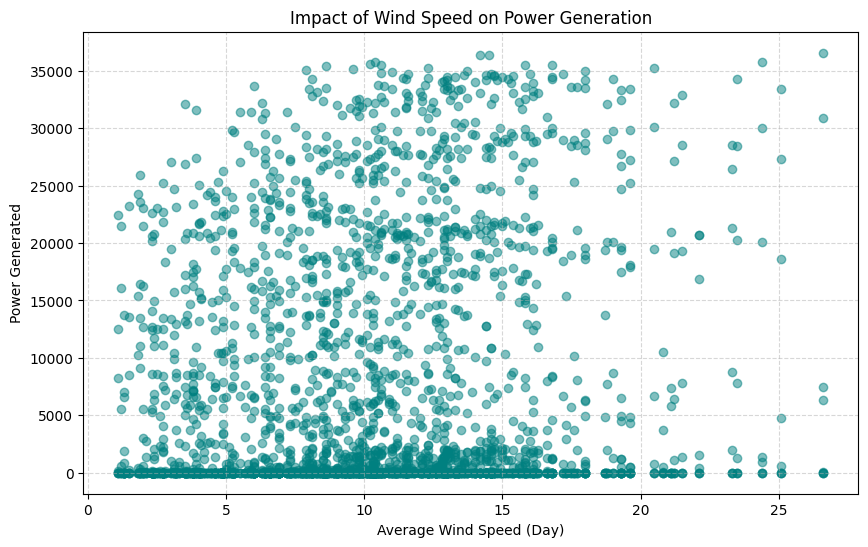

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Load your dataset
file_path = '../Dataset/Sonar.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Extract relevant columns
wind_speed = data['Average Wind Speed (Day)']
power_generated = data['Power Generated']

# Plotting the impact of wind speed on power generation
plt.figure(figsize=(10, 6))
plt.scatter(wind_speed, power_generated, alpha=0.5, color='teal')
plt.title("Impact of Wind Speed on Power Generation")
plt.xlabel("Average Wind Speed (Day)")
plt.ylabel("Power Generated")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [15]:
import lightningchart as lc
import pandas as pd
import numpy as np

# Load the license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = '../Dataset/Sonar.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# DEBUG: Print first few rows of the dataset to verify it is loaded correctly
print(df.head())

# Convert the necessary columns to standard Python types
angles = df['Average Wind Direction (Day)'].astype(float).values  # Wind directions (in degrees, 0 to 360)
power_generated = df['Power Generated'].astype(float).values  # Power generation values

# DEBUG: Print the min and max power generated values to verify the range
print(f"Min Power Generated: {power_generated.min()}, Max Power Generated: {power_generated.max()}")

# Create the polar chart
chart = lc.PolarChart(theme=lc.Themes.Light, title="Wind Direction vs. Power Generation")

# Add a Polar Point Series to the chart
point_series = chart.add_point_series()

# Get the min and max values for power generation
min_power, max_power = power_generated.min(), power_generated.max()

# Define a list to store point data
data_points = []

for i in range(len(angles)):
    angle = angles[i]
    amplitude = power_generated[i]  # Use the raw power generation value as the amplitude
    
    # DEBUG: Print each angle and amplitude to check the values being set
    print(f"Angle: {angle}, Amplitude: {amplitude}, Power: {power_generated[i]}")
    
    data_points.append({
        'angle': float(angle),  # Ensure the angle is a Python float
        'amplitude': amplitude,  # Use the power generation value directly for amplitude
        'value': float(power_generated[i])  # Add the power generation value as 'value' for color lookup
    })

# Apply the data to the Polar Point Series
point_series.set_data(data_points)

# DEBUG: Confirm data is applied to point series
print(f"Data points added to point series: {len(data_points)}")

# Set a color palette for the power generation values
point_series.set_palette_colors(
    steps=[
        {'value': min_power, 'color': lc.Color('purple')},   # Low power (purple)
        {'value': (min_power + max_power) * 0.25, 'color': lc.Color('blue')},  # Medium-low (blue)
        {'value': (min_power + max_power) * 0.5, 'color': lc.Color('green')},  # Medium (green)
        {'value': (min_power + max_power) * 0.75, 'color': lc.Color('yellow')},  # Medium-high (yellow)
        {'value': max_power, 'color': lc.Color('red')}  # High power (red)
    ],
    look_up_property='value',  # Use 'value' to look up the color
    interpolate=True,
    
)

# Set point size and shape
point_series.set_point_shape('circle').set_point_size(10)

# DEBUG: Confirm that the chart is being opened
print("Opening the chart...")
# Open the chart
chart.open()


   Day of Year  Year  Month  Day  First Hour of Period  Is Daylight  \
0          245  2008      9    1                     1        False   
1          245  2008      9    1                     4        False   
2          245  2008      9    1                     7         True   
3          245  2008      9    1                    10         True   
4          245  2008      9    1                    13         True   

   Distance to Solar Noon  Average Temperature (Day)  \
0                0.859897                         69   
1                0.628535                         69   
2                0.397172                         69   
3                0.165810                         69   
4                0.065553                         69   

   Average Wind Direction (Day)  Average Wind Speed (Day)  Sky Cover  \
0                            28                       7.5          0   
1                            28                       7.5          0   
2                   

127.0.0.1 - - [18/Oct/2024 11:32:17] "GET / HTTP/1.1" 200 -
